In [17]:
import docx
import pandas as pd

doc=docx.Document('VocabDrilling.docx')


In [12]:
len(doc.paragraphs)

85

In [28]:
com=[]
for paragraph in doc.paragraphs:
    com.append(paragraph.text)
 

In [30]:
com[0]


'Lackluster'

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en-BD"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><meta content="origin" name="referrer"><title>edmund martin - Google Search</title><script nonce="CXcKH+DiqD8HBYSsEkxzrQ==">(function(){window.google={kEI:'9iopXvX9D-WP4-EPkNOXkAM',kEXPI:'31',authuser:0,kGL:'BD',kBL:'rLJ1'};google.sn='web';google.kHL='en-BD';google.jsfs='Ffpdje';})();(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||google.kEI};google.getLEI=function(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b};google.ml=function(){return null};google.time=function(){return(new Date).getTime()};google.log=function(a,b,e,c,g){if(a=google.logUrl(a,b,e,c,g)){b=new Image;var d=google.lc,f=google.li;d[f]=b;b.onerror=b.onload=b.onabort=function(){delete d[f]
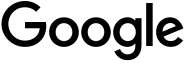
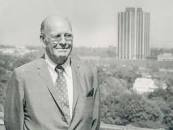
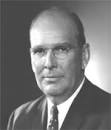
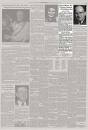

In [31]:
import requests
from bs4 import BeautifulSoup
 
 
USER_AGENT = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'}
 
 
def fetch_results(search_term, number_results, language_code):
    assert isinstance(search_term, str), 'Search term must be a string'
    assert isinstance(number_results, int), 'Number of results must be an integer'
    escaped_search_term = search_term.replace(' ', '+')
 
    google_url = 'https://www.google.com/search?q={}&num={}&hl={}'.format(escaped_search_term, number_results, language_code)
    response = requests.get(google_url, headers=USER_AGENT)
    response.raise_for_status()
 
    return search_term, response.text
 
if __name__ == '__main__':
    keyword, html = fetch_results('edmund martin', 100, 'en')
    print(html)

In [75]:
def parse_results(html, keyword):
    soup = BeautifulSoup(html, 'html.parser')
 
    found_results = []
    rank = 1
    result_block = soup.find_all('div', attrs={'class': 'g'})
    for result in result_block:
 
        link = result.find('a', href=True)
        title = result.find('h3')
        description = result.find('span', attrs={'class': 'st'})
        if link and title:
            link = link['href']
            title = title.get_text()
            if description:
                description = description.get_text()
            if link != '#':
                found_results.append({'keyword': keyword, 'description': description})
                
    return found_results

In [76]:
def scrape_google(search_term, number_results, language_code):
    try:
        keyword, html = fetch_results(search_term, number_results, language_code)
        results = parse_results(html, keyword)
        return results
    except AssertionError:
        raise Exception("Incorrect arguments parsed to function")
    except requests.HTTPError:
        raise Exception("You appear to have been blocked by Google")
    except requests.RequestException:
        raise Exception("Appears to be an issue with your connection")
 
 
if __name__ == '__main__':
    keywords = com
    data = []
    for keyword in keywords:
            results = scrape_google(keyword, 1, "en")
            for result in results:
                data.append(result)
    print(data)

[{'keyword': 'Lackluster', 'description': 'Lackluster definition is - lacking in sheen, brilliance, or vitality : dull, mediocre. How to use lackluster in a sentence. Did You Know?'}, {'keyword': 'Ascendant', 'description': "the rising sign is changing every 2 hours. ... So, if you can't get the exact time of birth and there are two possibilities (Aries / Taurus? ... Calculate your ascendant, zodiac sign, moon sign and horoscope of birth."}, {'keyword': 'Unflagging', 'description': 'Jan 15, 2020 - He had a passion for work in the archives, an unwavering commitment to original research and an unflagging energy in the pursuit of historical\xa0...'}, {'keyword': 'Defunct', 'description': 'Defunct definition is - no longer living, existing, or functioning. How to use defunct in a sentence. Did You Know? Synonym Discussion of defunct.'}, {'keyword': 'Invective', 'description': 'Invective definition is - insulting or abusive language : vituperation. How to use invective in a sentence. Did Yo

In [56]:
with open('VocabDrilling.docx', 'r') as filehandle:
    places = [current_place.rstrip() for current_place in filehandle.readlines()]

In [94]:
from docx import Document
from docx.shared import Inches

document = Document()
document.add_heading('Vocab Drilling', 0)

recordset = data
p.add_run('bold').bold = True
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'keyword'
hdr_cells[1].text = 'Description'
for item in recordset:
	#print(item)
	row_cells = table.add_row().cells
	row_cells[0].text = str(item['keyword'])
	row_cells[1].text = str(item['description'])


document.add_page_break()

document.save('simple.docx')